<a href="https://colab.research.google.com/github/LiliContreras/OPIS_2024/blob/GNSS_Tarea/xzy2llh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install getopt

ERROR: Could not find a version that satisfies the requirement getopt (from versions: none)
ERROR: No matching distribution found for getopt


In [ ]:
#!/bin/python3
import getopt #necesario para leer la lista de argumentos
import os
import sys
import matplotlib.pyplot as plt

In [ ]:
def main(argv):
   global X
   global Y
   global Z
   if len(sys.argv[1:]) < 1:
      print ('Usage: xyz2llh.py --xyz <X Y Z>')
      print ('-h for a detail help message.')
      sys.exit(2)
   try:
       opts,args = getopt.getopt(argv,"h",["xyz="])
   except getopt.GetoptError:
      print ('xyz2llh.py --xyz <X,Y,Z>')
      sys.exit(2)
   for opt,arg in opts:
      if opt == '-h':
         print ('    xyz2llh.py --xyz <X,Y,Z>         ')
         print ('                                            ')
         print (' Este programa convierte de coordenas X,Y,Z ')
         print (' a latitud longitus y altura, de coordenadas')
         print (' cartesianas a geodesicas.                  ')
         print ('                                            ')
         print (' X Y Z esta dado en km.                     ')
         print ('                                            ')
         print (' Para hacer la conversion se considera el   ')
         print (' elipoise WGS84.                            ')
         print ('                                            ')
         print ('                                            ')
         sys.exit(2)
      elif opt in ("--xyz"):
          X,Y,Z = map(float,arg.split(","))



In [ ]:
def xyz2gd (X,Y,Z):
    from numpy import matrix
    from numpy import linalg
    import numpy as np
    import fileinput
    import math
    import sys
    import os
    import subprocess
    """
    Argumentos de entrada:
       X,Y,Z coordenadas rectangulares que deben de estar en km.
    Argumentos de salida:
       alat1 Latitud en radianes
       along1 Longitud (positiva al este) en radianes.
       hght1 Altura elipsoidal

    """
    # Valores del elipsoide de referencia WGS84
    semi = 6378.137 #semi axis a en km
    finv = 298.257223563
    twopi= 8*math.atan(1.)
    f= 1/finv
    b = -f*semi +semi
    ep2 = (semi*semi - b*b)/(b*b)
    e2 = 2*f - f*f
    sqr = math.sqrt(X**(2)+Y**(2))
######################################
    if (sqr == 0.0):
       alat1 = twopi/4*np.sign(Z)
       along1 = 0.0
       hght = Z - math.sqrt(b2)
    else:
       alat1 = math.atan(((finv/(1.0-finv))**2)*Z/sqr)
       #alat2 = math.atan(Z/((1-e2)*sqr)) #igual a alat1
#### Calculando longitud
       if (X == 0.0):
          if (Y < 0.0):
             along1 = 3*twopi/4
          else:
             along1 = twopi/4
       else:
          along1 = math.atan2(Y,X)
#### Caculando la altura
       sinlat = math.sin(alat1)
       coslat = math.cos(alat1)
       N = (semi**2)/(math.sqrt(semi**2*coslat**2+b**2*sinlat**2))
       d1 = 1.0/math.sqrt(semi*semi*coslat**2 + b*b*sinlat**2)
       x0 = semi*semi*coslat*d1
       y0 = b*b*sinlat*d1
       hght1 = (math.sqrt((sqr-x0)**2+(Z-y0)**2)*np.sign(sqr**2+Z**2-math.sqrt(x0**2+y0**2)))*1000 # se mul por mil para pasar a metros
       alongdegree1 = math.degrees(along1)
       alatdegree1 = math.degrees(alat1)
       #print (alongdegree1,alatdegree1,hght1)
    return (along1,alat1,hght1,alongdegree1,alatdegree1)

if __name__ == "__main__":
   main(sys.argv[1:])



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



xyz2llh.py --xyz <X,Y,Z>
Traceback (most recent call last):
  File "<ipython-input-2-e3c627eced02>", line 10, in main
    opts,args = getopt.getopt(argv,"h",["xyz="])
  File "/usr/lib/python3.10/getopt.py", line 95, in getopt
    opts, args = do_shorts(opts, args[0][1:], shortopts, args[1:])
  File "/usr/lib/python3.10/getopt.py", line 195, in do_shorts
    if short_has_arg(opt, shortopts):
  File "/usr/lib/python3.10/getopt.py", line 211, in short_has_arg
    raise GetoptError(_('option -%s not recognized') % opt, opt)
getopt.GetoptError: option -f not recognized

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-1a8d55d0ba15>", line 58, in <cell line: 57>
    main(sys.argv[1:])
  File "<ipython-input-2-e3c627eced02>", line 13, in main
    sys.exit(2

TypeError: object of type 'NoneType' has no len()

In [ ]:
#CGIG:
X=-1.70036516466301e+06
Y=-5.24024040078408e+06
Z=3.20612675878184e+06

coord = xyz2gd(X,Y,Z)
CGIG_long1 = "{:.11f}".format(coord[3])
CGIG_lat = "{:.11f}".format(coord[4])
CGIG_alt = "{:.11f}".format(coord[2])
print (CGIG_long1,CGIG_lat,CGIG_alt)

-107.97732831602 30.36518654804 6367841750.61698150635


In [ ]:
#COMI:
X=-2.28400717630000e+05
Y=-6.12123948008000e+06
Z=1.77714279056000e+06

coord = xyz2gd(X,Y,Z)
COMI_long1 = "{:.11f}".format(coord[3])
COMI_lat = "{:.11f}".format(coord[4])
COMI_alt = "{:.11f}".format(coord[2])
print (COMI_long1,COMI_lat,COMI_alt)

-92.13687588999 16.28189039492 6371709149.56900024414


In [ ]:
#CRIG:
X=-9.69586776000000e+05
Y=-6.03231701200000e+06
Z=1.82493936100000e+06

coord = xyz2gd(X,Y,Z)
CRIG_long1 = "{:.11f}".format(coord[3])
CRIG_lat = "{:.11f}".format(coord[4])
CRIG_alt = "{:.11f}".format(coord[2])
print (CRIG_long1,CRIG_lat,CRIG_alt)

-99.13116956339 16.73636904000 6370092137.58104228973


In [ ]:
#CSIG:
X=-1.79498039640000e+06
Y=-5.40499762970000e+06
Z=2.86210481138000e+06

coord = xyz2gd(X,Y,Z)
CSIG_long1 = "{:.11f}".format(coord[3])
CSIG_lat = "{:.11f}".format(coord[4])
CSIG_alt = "{:.11f}".format(coord[2])
print (CSIG_long1,CSIG_lat,CSIG_alt)

-108.37114256961 26.83615710693 6367604380.95587825775


In [ ]:
#DEMA:
X=-9.40103420420000e+05
Y=-5.91196436589000e+06
Z=2.19960295828000e+06

coord = xyz2gd(X,Y,Z)
DEMA_long1 = "{:.11f}".format(coord[3])
DEMA_lat = "{:.11f}".format(coord[4])
DEMA_alt = "{:.11f}".format(coord[2])
print (DEMA_long1,DEMA_lat,DEMA_alt)

-99.03535812003 20.30040651258 6371192158.13801670074


In [ ]:
#DOAR:
X=-1.02273049400000e+06
Y=-6.01440055100000e+06
Z=1.85513027660000e+06

coord = xyz2gd(X,Y,Z)
DOAR_long1 = "{:.11f}".format(coord[3])
DOAR_lat = "{:.11f}".format(coord[4])
DOAR_alt = "{:.11f}".format(coord[2])
print (DOAR_long1,DOAR_lat,DOAR_alt)

-99.65065999852 17.02104406606 6370182313.92043399811


In [ ]:
#HLIG:
X=-8.24895484900000e+05
Y=-6.01911620280000e+06
Z=1.94101747780000e+06

coord = xyz2gd(X,Y,Z)
HLIG_long1 = "{:.11f}".format(coord[3])
HLIG_lat = "{:.11f}".format(coord[4])
HLIG_alt = "{:.11f}".format(coord[2])
print (HLIG_long1,HLIG_lat,HLIG_alt)

-97.80354239692 17.82999194853 6371535836.49827766418


In [ ]:
#SRIG:
X=-2.14638388781929e+06
Y=-5.24881714947770e+06
Z=2.90974499686177e+06

coord = xyz2gd(X,Y,Z)
SRIG_long1 = "{:.11f}".format(coord[3])
SRIG_lat = "{:.11f}".format(coord[4])
SRIG_alt = "{:.11f}".format(coord[2])
print (SRIG_long1,SRIG_lat,SRIG_alt)

-112.24098609006 27.31977710015 6367295705.45285606384


In [ ]:
#SSIG:
X=-1.70762592560000e+06
Y=-5.53528529140000e+06
Z=2.66069048648000e+06

coord = xyz2gd(X,Y,Z)
SSIG_long1 = "{:.11f}".format(coord[3])
SSIG_lat = "{:.11f}".format(coord[4])
SSIG_alt = "{:.11f}".format(coord[2])
print (SSIG_long1,SSIG_lat,SSIG_alt)

-107.14490375053 24.81645574466 6368156443.62362480164


In [ ]:
#TMIG:
X=-1.2840671040055e+06
Y=-5.88380261504978e+06
Z=2.100605670011311e+06

coord = xyz2gd(X,Y,Z)
TMIG_long1 = "{:.11f}".format(coord[3])
TMIG_lat = "{:.11f}".format(coord[4])
TMIG_alt = "{:.11f}".format(coord[2])
print (TMIG_long1,TMIG_lat,TMIG_alt)

-102.31106793885 19.34902959100 6371751325.73618125916


In [ ]:
#UCOE:
X=-1.21711192330000e+06
Y=-5.88009342170000e+06
Z=2.14892048560000e+06

coord = xyz2gd(X,Y,Z)
UCOE_long1 = "{:.11f}".format(coord[3])
UCOE_lat = "{:.11f}".format(coord[4])
UCOE_alt = "{:.11f}".format(coord[2])
print (UCOE_long1,UCOE_lat,UCOE_alt)

-101.69442300050 19.81321810709 6371297806.60638046265


In [ ]:
#ZIHU:
X=-1.20875579292000e+06
Y=-5.95988200305000e+06
Z=1.91696605170000e+06

coord = xyz2gd(X,Y,Z)
ZIHU_long1 = "{:.11f}".format(coord[3])
ZIHU_lat = "{:.11f}".format(coord[4])
ZIHU_alt = "{:.11f}".format(coord[2])
print (ZIHU_long1,ZIHU_lat,ZIHU_alt)

-101.46495390002 17.60691296224 6369832937.20165348053


In [ ]:
EstacionesXno=[CGIG_long1,COMI_long1,CRIG_long1,CSIG_long1,DEMA_long1,DOAR_long1,HLIG_long1,SRIG_long1,SSIG_long1,TMIG_long1,UCOE_long1,ZIHU_long1]
EstacionesYno=[CGIG_lat,COMI_lat,CRIG_lat,CSIG_lat,DEMA_lat,DOAR_lat,HLIG_lat,SRIG_lat,SSIG_lat,TMIG_lat,UCOE_lat,ZIHU_lat]
nombresNO = ['CGIG', 'COMI', 'CRIG', 'CSIG', 'DEMA', 'DOAR', 'HLIG','SRIG','SSIG','TMIG','UCOE','ZIHU']

In [ ]:
import csv

# Combinar las variables en una lista de tuplas
data = zip(nombresNO, EstacionesXno, EstacionesYno)

# Nombre del archivo CSV
nombre_archivo = 'estacionesNO.csv'

# Escribir los datos en el archivo CSV
with open(nombre_archivo, 'w', newline='') as archivo:
    escritor_csv = csv.writer(archivo)

    # Escribir encabezados
    escritor_csv.writerow(['Nombre', 'Longitud', 'Latitud'])

    # Escribir datos
    for estacion in data:
        escritor_csv.writerow(estacion)

In [ ]:
#FORS:
X=-1.41739201113911e+06
Y=-5.84815479433737e+06
Z=2.11432323393639e+06

coord = xyz2gd(X,Y,Z)
FORS_long1 = "{:.11f}".format(coord[3])
FORS_lat = "{:.11f}".format(coord[4])
FORS_alt = "{:.11f}".format(coord[2])
print (FORS_long1,FORS_lat,FORS_alt)

-103.62382566435 19.48033278589 6371733453.48999309540


In [ ]:
#inca:
X=-1.41521081500000e+06
Y=-5.84783281900000e+06
Z=2.11934717000000e+06

coord = xyz2gd(X,Y,Z)
INCA_long1 = "{:.11f}".format(coord[3])
INCA_lat = "{:.11f}".format(coord[4])
INCA_alt = "{:.11f}".format(coord[2])
print (INCA_long1,INCA_lat,INCA_alt)

-103.60436103977 19.52560246791 6372621236.51017475128


In [ ]:
#neva:
X=-1.41635347267737e+06
Y=-5.84673750546506e+06
Z=2.12384321500476e+06

coord = xyz2gd(X,Y,Z)
NEVA_long1 = "{:.11f}".format(coord[3])
NEVA_lat = "{:.11f}".format(coord[4])
NEVA_alt = "{:.11f}".format(coord[2])
print (NEVA_long1,NEVA_lat,NEVA_alt)

-103.61739229410 19.56627319823 6373366136.44528007507


In [ ]:
#stok:
X=-1.42745755240000e+06
Y=-5.85202347570000e+06
Z=2.09153503370000e+06

coord = xyz2gd(X,Y,Z)
STOK_long1 = "{:.11f}".format(coord[3])
STOK_lat = "{:.11f}".format(coord[4])
STOK_alt = "{:.11f}".format(coord[2])
print (STOK_long1,STOK_lat,STOK_alt)

-103.70820625810 19.26775086594 6370012855.98012733459


In [ ]:
#teco:
X=-1.44544205740000e+06
Y=-5.85784701210000e+06
Z=2.06180214600000e+06

coord = xyz2gd(X,Y,Z)
TECO_long1 = "{:.11f}".format(coord[3])
TECO_lat = "{:.11f}".format(coord[4])
TECO_alt = "{:.11f}".format(coord[2])
print (TECO_long1,TECO_lat,TECO_alt)

-103.86102100028 18.98455796870 6369728127.13263130188


In [ ]:
#tnam:
X=-1.44247353930000e+06
Y=-5.79975016980000e+06
Z=2.22375326930000e+06

coord = xyz2gd(X,Y,Z)
TNAM_long1 = "{:.11f}".format(coord[3])
TNAM_lat = "{:.11f}".format(coord[4])
TNAM_alt = "{:.11f}".format(coord[2])
print (TNAM_long1,TNAM_lat,TNAM_alt)

-103.96682299970 20.53566330427 6370372121.59808158875


In [ ]:
#tncc:
X=-1.37675799590166e+06
Y=-5.88233005041134e+06
Z=2.04181700126650e+06

coord = xyz2gd(X,Y,Z)
TNCC_long1 = "{:.11f}".format(coord[3])
TNCC_lat = "{:.11f}".format(coord[4])
TNCC_alt = "{:.11f}".format(coord[2])
print (TNCC_long1,TNCC_lat,TNCC_alt)

-103.17294544712 18.79109731738 6370636380.42059516907


In [ ]:
#tncm:
X=-1.56126068040000e+06
Y=-5.80852210530000e+06
Z=2.11543574010000e+06

coord = xyz2gd(X,Y,Z)
TNCM_long1 = "{:.11f}".format(coord[3])
TNCM_lat = "{:.11f}".format(coord[4])
TNCM_alt = "{:.11f}".format(coord[2])
print (TNCM_long1,TNCM_lat,TNCM_alt)

-105.04482799986 19.49813958189 6369479647.18431091309


In [ ]:
#tnct:
X=-1.58112844080000e+06
Y=-5.79601585550000e+06
Z=2.13449013920000e+06

coord = xyz2gd(X,Y,Z)
TNCT_long1 = "{:.11f}".format(coord[3])
TNCT_lat = "{:.11f}".format(coord[4])
TNCT_alt = "{:.11f}".format(coord[2])
print (TNCT_long1,TNCT_lat,TNCT_alt)

-105.25877000028 19.68113483255 6369345021.79376792908


In [ ]:
#tnlc:
X=-1.51092881180000e+06
Y=-5.82169440290000e+06
Z=2.11633120030000e+06

coord = xyz2gd(X,Y,Z)
TNLC_long1 = "{:.11f}".format(coord[3])
TNLC_lat = "{:.11f}".format(coord[4])
TNLC_alt = "{:.11f}".format(coord[2])
print (TNLC_long1,TNLC_lat,TNLC_alt)

-104.54921499984 19.50612713850 6369664485.41263103485


In [ ]:
#tnmt:
X=-1.48261924100000e+06
Y=-5.82754384830000e+06
Z=2.12519280690000e+06

coord = xyz2gd(X,Y,Z)
TNMT_long1 = "{:.11f}".format(coord[3])
TNMT_lat = "{:.11f}".format(coord[4])
TNMT_alt = "{:.11f}".format(coord[2])
print (TNMT_long1,TNMT_lat,TNMT_alt)

-104.27411900005 19.58575594574 6371309689.14760589600


In [ ]:
#tntm:
X=-1.53781331870000e+06
Y=-5.82453952750000e+06
Z=2.08836547950000e+06

coord = xyz2gd(X,Y,Z)
TNTM_long1 = "{:.11f}".format(coord[3])
TNTM_lat = "{:.11f}".format(coord[4])
TNTM_alt = "{:.11f}".format(coord[2])
print (TNTM_long1,TNTM_lat,TNTM_alt)

-104.78991800005 19.23914823879 6369469279.14410114288


In [ ]:
#Sismo 19 sep 2022:
lat=18.24
longi=-103.29

In [ ]:
EstacionesX=[FORS_long1,INCA_long1,NEVA_long1,STOK_long1,TECO_long1,TNAM_long1,TNCC_long1,TNCM_long1,TNCT_long1,TNLC_long1,TNMT_long1,TNTM_long1]
EstacionesY=[FORS_lat,INCA_lat,NEVA_lat,STOK_lat,TECO_lat,TNAM_lat,TNCC_lat,TNCM_lat,TNCT_lat,TNLC_lat,TNMT_lat,TNTM_lat]
nombres = ['FORS', 'INCA', 'NEVA', 'STOK', 'TECO', 'TNAM', 'TNCC','TNCM','TNCT','TNLC','TNMT','TNTM']

In [ ]:
import csv

# Combinar las variables en una lista de tuplas
data = zip(nombres, EstacionesX, EstacionesY)

# Nombre del archivo CSV
nombre_archivo = 'estaciones.csv'

# Escribir los datos en el archivo CSV
with open(nombre_archivo, 'w', newline='') as archivo:
    escritor_csv = csv.writer(archivo)

    # Escribir encabezados
    escritor_csv.writerow(['Nombre', 'Longitud', 'Latitud'])

    # Escribir datos
    for estacion in data:
        escritor_csv.writerow(estacion)

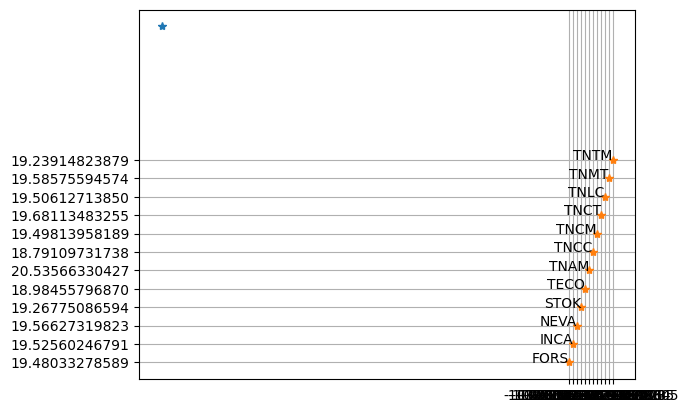

In [ ]:
plt.plot(longi,lat,'*')
plt.plot(EstacionesX,EstacionesY,'*')

# Agregar etiquetas a cada punto
for i, txt in enumerate(nombres):
    plt.text(EstacionesX[i], EstacionesY[i], txt, ha='right')

plt.grid(True)

plt.show()